<a href="https://colab.research.google.com/github/isoittech/udemy-Hands-on-PyTorch/blob/main/08_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

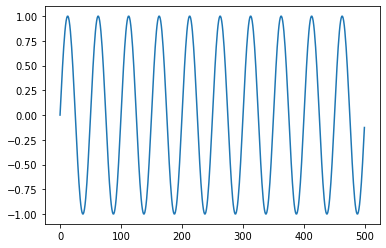

In [3]:
x = np.linspace(0, 499, 500)
y = np.sin(x * 2 * np.pi / 50)
plt.plot(x, y)

In [6]:
def make_sequence_data(y, num_sequence):
    num_data = len(y)
    seq_data = []
    target_data = []
    for i in range(num_data - num_sequence):
        seq_data.append(y[i: i+num_sequence])
        target_data.append(y[i+num_sequence: i+num_sequence+1])
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)
    return seq_arr, target_arr


In [9]:
seq_length = 40
y_seq, y_target = make_sequence_data(y, seq_length)

In [10]:
y_seq.shape

(460, 40)

In [11]:
y_target.shape

(460, 1)

In [13]:
num_test = 10
y_seq_train = y_seq[: -num_test]
y_seq_test = y_seq[-num_test:]
y_target_train = y_target[:-num_test]
y_target_test = y_target[-num_test:]

In [15]:
y_seq_train

array([[ 0.00000000e+00,  1.25333234e-01,  2.48689887e-01, ...,
        -9.98026728e-01, -9.98026728e-01, -9.82287251e-01],
       [ 1.25333234e-01,  2.48689887e-01,  3.68124553e-01, ...,
        -9.98026728e-01, -9.82287251e-01, -9.51056516e-01],
       [ 2.48689887e-01,  3.68124553e-01,  4.81753674e-01, ...,
        -9.82287251e-01, -9.51056516e-01, -9.04827052e-01],
       ...,
       [-3.68124553e-01, -2.48689887e-01, -1.25333234e-01, ...,
        -9.04827052e-01, -9.51056516e-01, -9.82287251e-01],
       [-2.48689887e-01, -1.25333234e-01, -2.20436424e-15, ...,
        -9.51056516e-01, -9.82287251e-01, -9.98026728e-01],
       [-1.25333234e-01, -2.20436424e-15,  1.25333234e-01, ...,
        -9.82287251e-01, -9.98026728e-01, -9.98026728e-01]])

In [16]:
y_seq_train.shape

(450, 40)

In [17]:
y_seq_t = torch.FloatTensor(y_seq_train)
y_target_t = torch.FloatTensor(y_target_train)

In [18]:
class LSTM(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=1, hidden_size=self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, 1)
    
    def forward(self, x):
        x, _ = self.lstm(x)
        x_last = x[-1] # 1番最後の値
        x = self.linear(x_last)
        return x


In [19]:
model = LSTM(100)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
y_seq_t.size()

torch.Size([450, 40])

In [21]:
y_seq_t = y_seq_t.permute(1,0)
y_target_t = y_target_t.permute(1,0)

In [22]:
y_seq_t.size()

torch.Size([40, 450])

In [23]:
y_seq_t = y_seq_t.unsqueeze(dim=-1)
y_target_t = y_target_t.unsqueeze(dim=-1)

In [24]:
y_seq_t.size()

torch.Size([40, 450, 1])

In [26]:
num_epoch = 80
losses = []
for epoch in range(num_epoch):
    optimizer.zero_grad()
    output = model(y_seq_t)
    loss = criterion(output , y_target_t)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 450, 1])) that is different to the input size (torch.Size([450, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0, loss: 0.5186294317245483
epoch: 10, loss: 0.39341139793395996
epoch: 20, loss: 0.23351600766181946
epoch: 30, loss: 0.0683470070362091
epoch: 40, loss: 0.019626658409833908
epoch: 50, loss: 0.007318677380681038
epoch: 60, loss: 0.005362334195524454
epoch: 70, loss: 0.0016681861598044634


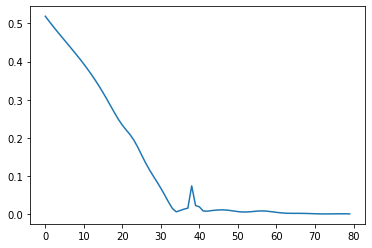

In [27]:
plt.plot(losses)

In [29]:
y_seq_test_t = torch.FloatTensor(y_seq_test)
y_seq_test_t = y_seq_test_t.permute(1,0)
y_seq_test_t = y_seq_test_t.unsqueeze(dim=-1)

In [31]:
y_seq_test_t.size()

torch.Size([40, 10, 1])

In [32]:
y_pred = model(y_seq_test_t)

In [34]:
y_pred.size()

torch.Size([10, 1])

(450.0, 500.0)

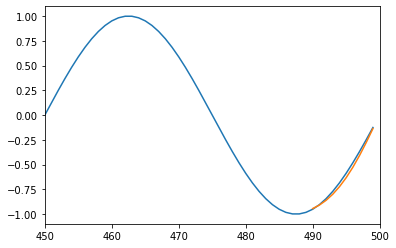

In [37]:
plt.plot(x, y)
plt.plot(np.arange(490, 500), y_pred.detach())
plt.xlim([450, 500])